In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('/content/Salary_Data[1].csv')
display(df.head())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
print("Missing values before preprocessing:")
print(df[['Years of Experience', 'Salary']].isnull().sum())


Missing values before preprocessing:
Years of Experience    3
Salary                 5
dtype: int64


In [ ]:
df_cleaned = df.dropna(subset=['Years of Experience', 'Salary']).copy()

print("\nMissing values after dropping rows with NaNs in key columns:")
print(df_cleaned[['Years of Experience', 'Salary']].isnull().sum())



Missing values after dropping rows with NaNs in key columns:
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:

df_cleaned['Years of Experience'] = pd.to_numeric(df_cleaned['Years of Experience'], errors='coerce')
df_cleaned['Salary'] = pd.to_numeric(df_cleaned['Salary'], errors='coerce')

df_cleaned.dropna(subset=['Years of Experience', 'Salary'], inplace=True)

print("\nData types after preprocessing:")
print(df_cleaned[['Years of Experience', 'Salary']].dtypes)


Data types after preprocessing:
Years of Experience    float64
Salary                 float64
dtype: object


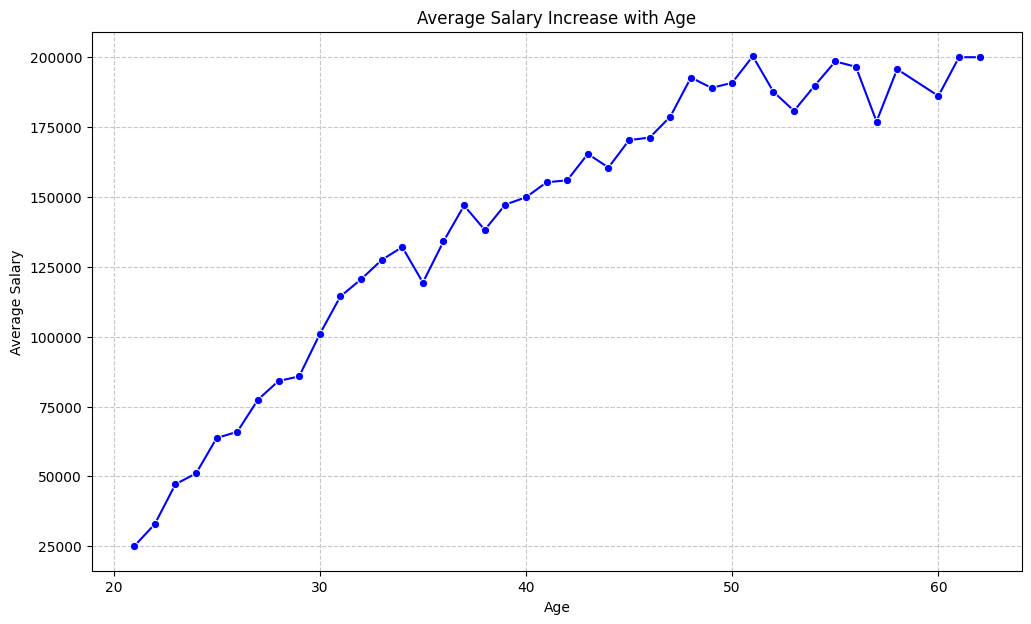

In [ ]:
# Calculate the average salary for each age
average_salary_by_age = df_cleaned.groupby('Age')['Salary'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(x='Age', y='Salary', data=average_salary_by_age, marker='o', color='blue')
plt.title('Average Salary Increase with Age')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

R-squared score: 0.67


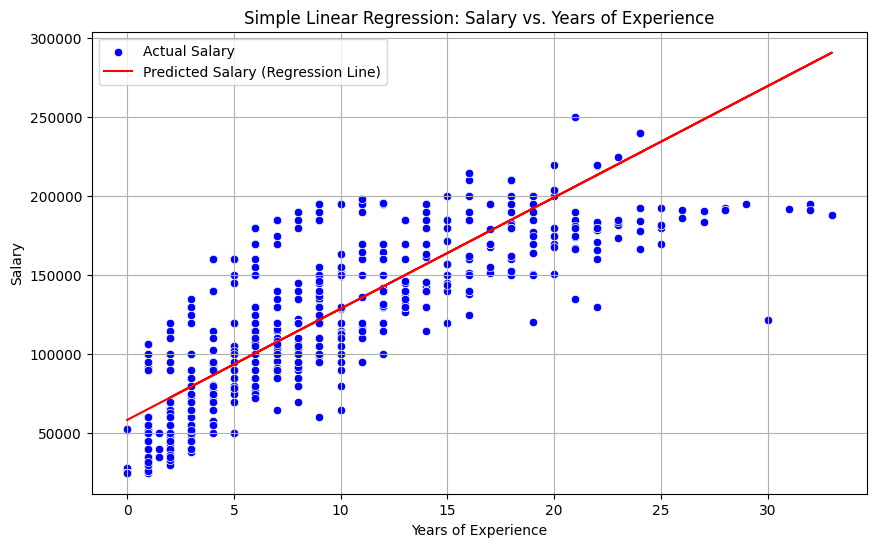

In [ ]:

X = df_cleaned[['Years of Experience']]
y = df_cleaned['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Years of Experience'], y=y_test, color='blue', label='Actual Salary')
plt.plot(X_test, y_pred, color='red', label='Predicted Salary (Regression Line)')
plt.title('Simple Linear Regression: Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

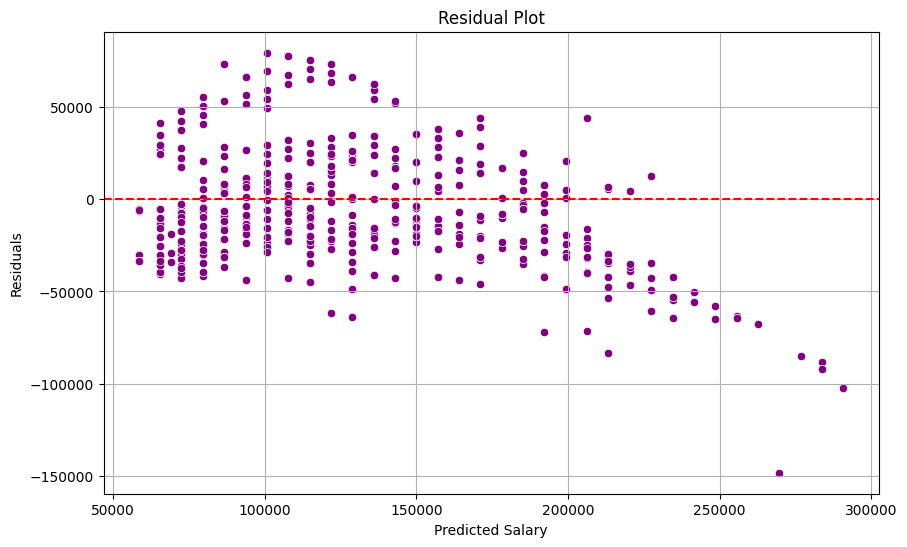

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

### Linear Regression Model Coefficients

Let's print the coefficient and intercept of the trained linear regression model. These values define the equation of the regression line: `Salary = Intercept + Coefficient * Years of Experience`.

In [ ]:
print(f"Model Coefficient (Years of Experience): {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")

Model Coefficient (Years of Experience): 7042.70
Model Intercept: 58398.09


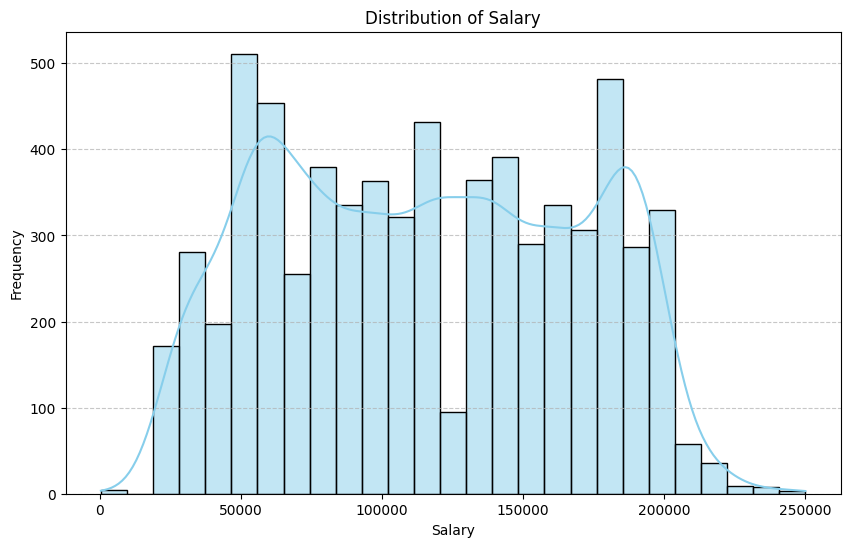

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Salary'], kde=True, color='skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-2725837624.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level', y='Salary', data=df_cleaned, palette='coolwarm')


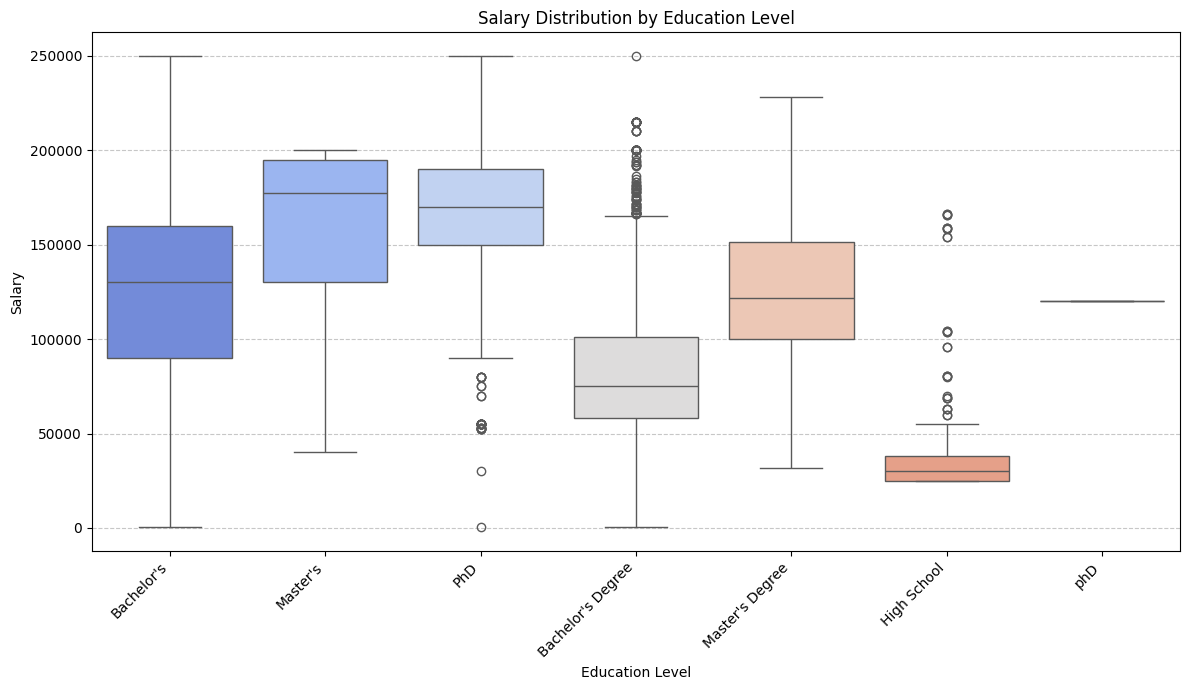

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Education Level', y='Salary', data=df_cleaned, palette='coolwarm')
plt.title('Salary Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

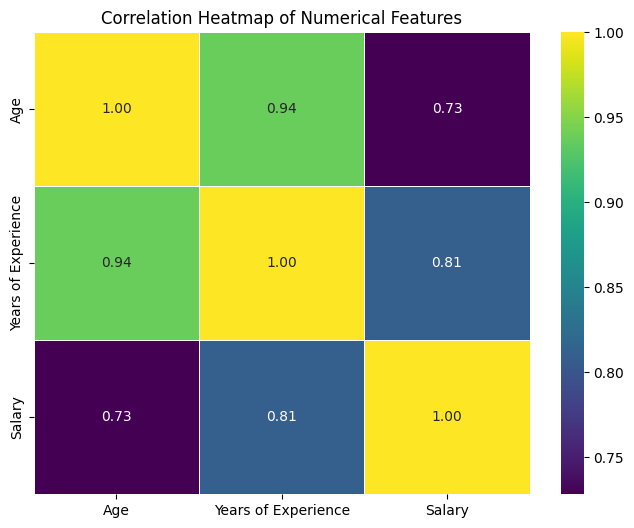

In [ ]:
numerical_cols = ['Age', 'Years of Experience', 'Salary']
correlation_matrix = df_cleaned[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()